# SMILES of a molecule --> SMARTS of substructures

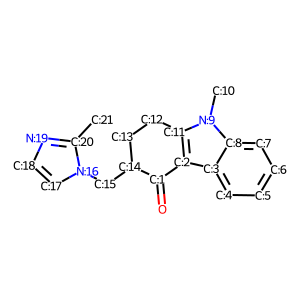

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
from substruc import substruc_search
DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 3.0

#One example molecule for searching substructures
smi = 'O=C1c2c3ccccc3n(C)c2CCC1Cn4ccnc4C'
mol = Chem.MolFromSmiles(smi)
for atom in mol.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())

Draw.MolToImage(mol)

# Find molecules containing a substructure of interest

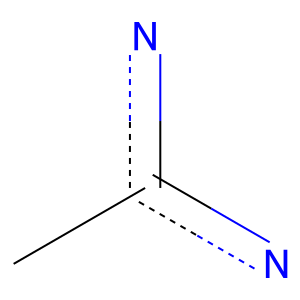

In [2]:
# substructure search 
## Refer to substruc.py
sub_smi, sub_sma = substruc_search(smi)
sub_sma = sorted(list(set(sub_sma)))

substruc_of_interest = sub_sma[14]
Draw.MolToImage(Chem.MolFromSmarts(substruc_of_interest))

In [3]:
# description of a SMARTS string: 
# https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html
# -single bond, :aromatic bond
print(substruc_of_interest)

[#7]:[#6](-[#6]):[#7]


In [4]:
# Find the molecules having the substructure of interest twice
# If I set len(mol.GetSubstructMatches(mol2)) == 1, there were too many molecules

def substruc_match(smiles):
    substruc_of_interest = '[#7]:[#6](-[#6]):[#7]'
    
    mol2 = Chem.MolFromSmarts(substruc_of_interest)
    mol = Chem.MolFromSmiles(smiles)
    
    if len(mol.GetSubstructMatches(mol2)) == 2:
        return True
    else:
        return False

In [5]:
# BDE-db: A collection of 290,664 Homolytic Bond Dissociation Enthalpies for Small Organic Molecules. 
# figshare https://doi.org/10.6084/m9.figshare.10248932.v1
# The BDE database used for developing ALFABET

import pandas as pd
bde_db = pd.read_csv('rdf_data_190531.csv')
match_molecules = []
for _smi in bde_db.molecule.unique():
    if substruc_match(_smi):
        match_molecules.append(_smi)
print('.'.join(match_molecules))

n1nc(-c2nn[nH]n2)n[nH]1.Cc1nnc(C)n1N.COc1nc(C)nc(C)n1.CCc1ncnc(CC)n1.CCc1nnc(CC)n1N.CCc1n[nH]c(CC)n1.CCc1nnc(CC)nn1.Cc1nc(C)n(C)n1.CCc1nc(C)nc(N)n1.Nn1c(CO)nnc1CO.c1n[nH]c(-c2ncn[nH]2)n1.N#Cc1n[nH]c(C(=O)O)n1.Cc1nc(=O)nc(C)[nH]1.COC(=O)c1n[nH]c(C)n1.CCn1nc(C)nc1C.Cc1nnc(C(C)C)nn1.Cc1nnc(C)n1O.On1ccnc2ncnc1-2.Cc1nc(C)n(CCO)n1.NCCc1n[nH]c(CN)n1.Cc1nc(C)n(CO)n1.CCc1n[nH]c(CC#N)n1.Cc1nc([C@H](C)N)n[nH]1.CCn1c(C)nnc1C.CCn1nc(C=O)nc1C.Cc1nnc(C=O)n1C.Cc1nnc(CO)n1C.CCc1n[nH]c(CN)n1.CCc1nnc2n1CCC2.CNCc1nnc(C)n1C.CCc1n[nH]c(CCN)n1.Cc1nc([C@H](C)O)n[nH]1.CCc1n[nH]c(CO)n1.CCc1nnc(CO)n1C.COCc1nc(CN)n[nH]1.NCc1n[nH]c(CO)n1


## Counting the number of distinct substructures in a database

In [6]:
## Go to substruc.py

# Morgan Fingerprint

In [7]:
from rdkit.Chem import AllChem
#'info' dictionary
# *key - position of a vector corresponding to each substructure
# *item - (atom index, radius) of substructure(s)
# radius = 0 indicates an atom

info = {}
fp = AllChem.GetMorganFingerprint(mol, 0, bitInfo = info)
for key in sorted(info.keys()):
    print(key,info[key])

864942730 ((0, 0),)
2041434490 ((19, 0),)
2092489639 ((9, 0), (16, 0))
2245384272 ((15, 0),)
2246728737 ((10, 0), (21, 0))
2968968094 ((12, 0), (13, 0))
2976033787 ((14, 0),)
3217380708 ((1, 0), (2, 0), (3, 0), (8, 0), (11, 0), (20, 0))
3218693969 ((4, 0), (5, 0), (6, 0), (7, 0), (17, 0), (18, 0))


In [8]:
# useFeatures = True -> e.g.) bitinfo 4: aromatic atoms
info = {}
fp = AllChem.GetMorganFingerprint(mol, 1, bitInfo = info, useFeatures=True)
for key in sorted(info.keys()):
    print(key,info[key])

0 ((1, 0), (10, 0), (12, 0), (13, 0), (14, 0), (15, 0), (21, 0))
2 ((0, 0),)
4 ((2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (11, 0), (17, 0), (18, 0), (20, 0))
6 ((9, 0), (16, 0), (19, 0))
594405804 ((2, 1),)
594405818 ((11, 1),)
594405931 ((20, 1),)
594910150 ((9, 1), (16, 1))
614173680 ((1, 1),)
614176388 ((14, 1),)
1541844807 ((8, 1),)
1541844861 ((3, 1),)
3205496001 ((21, 1),)
3205496007 ((10, 1),)
3205496824 ((0, 1),)
3764335747 ((19, 1),)
3764344801 ((4, 1), (5, 1), (6, 1), (7, 1))
3764344823 ((17, 1), (18, 1))
3766532888 ((13, 1),)
3766532898 ((15, 1),)
3766532900 ((12, 1),)


In [9]:
# Morgan fingerprint is a very sparse vector representation of molecules, because
# The number of possible substructures grows exponentially 
# as radius and the number of elements increase.
# nBits can be adjusted
info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo = info, useFeatures=True)
#fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo = info)
for key in sorted(info.keys()):
    print(key,info[key])

# Dimensionality reduction can also be done using PCA or SVD
# Maybe we will do these next week

0 ((1, 0), (10, 0), (12, 0), (13, 0), (14, 0), (15, 0), (21, 0))
2 ((0, 0),)
4 ((2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (11, 0), (17, 0), (18, 0), (20, 0))
6 ((9, 0), (16, 0), (19, 0))
17 ((15, 2),)
88 ((17, 2),)
131 ((19, 1),)
191 ((3, 2),)
193 ((21, 1),)
199 ((10, 1),)
352 ((14, 2),)
371 ((4, 2),)
381 ((8, 2),)
397 ((7, 2),)
421 ((16, 2),)
428 ((2, 1),)
442 ((11, 1),)
461 ((2, 2),)
555 ((20, 1), (11, 2))
596 ((18, 2),)
598 ((5, 2), (6, 2))
644 ((14, 1),)
684 ((20, 2),)
719 ((13, 2),)
744 ((12, 2),)
746 ((1, 2),)
792 ((13, 1),)
802 ((15, 1),)
804 ((12, 1),)
839 ((8, 1),)
855 ((19, 2),)
893 ((3, 1),)
966 ((9, 1), (16, 1))
967 ((9, 2),)
993 ((4, 1), (5, 1), (6, 1), (7, 1))
1008 ((1, 1),)
1015 ((17, 1), (18, 1))
1016 ((0, 1),)


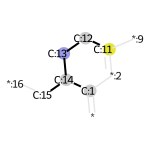

In [10]:
Draw.DrawMorganBit(mol, 719, info, useSVG=True)

In [11]:
# Morgan fingerprint -> SMARTS of a substructure
atom_center, radius = info[719][0]
env = Chem.FindAtomEnvironmentOfRadiusN(mol,radius,atom_center)
amap = {}
submol = Chem.PathToSubmol(mol, env, atomMap= amap)
print(Chem.MolToSmarts(submol))
print(Chem.MolToSmiles(submol))

[#6:11]-[#6:12]-[#6:13]-[#6:14](-[#6:15])-[#6:1]
[CH3:1][CH:14]([CH2:13][CH2:12][cH3:11])[CH3:15]


In [12]:
# Morgan fingerprint of two molecules
mol1 = Chem.MolFromSmiles('O=C1c2c3ccccc3n(C)c2CCC1Cn4ccnc4C')
mol2 = Chem.MolFromSmiles('O=C(N5CCN(c4ccc(OC[C@@H]1O[C@](OC1)(c2ccc(Cl)cc2Cl)Cn3ccnc3)cc4)CC5)C')
info1 = {}
info2 = {}
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=4096, bitInfo = info1, useFeatures=True)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=4096, bitInfo = info2, useFeatures=True)
#print(len(info1.keys()))
#print(len(info2.keys()))
for key in sorted(info1.keys()):
    print(key,info1[key])

0 ((1, 0), (10, 0), (12, 0), (13, 0), (14, 0), (15, 0), (21, 0))
2 ((0, 0),)
4 ((2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (11, 0), (17, 0), (18, 0), (20, 0))
6 ((9, 0), (16, 0), (19, 0))
80 ((5, 3),)
350 ((14, 3),)
414 ((13, 3),)
421 ((16, 2),)
461 ((2, 2),)
596 ((18, 2),)
804 ((19, 3),)
968 ((20, 3),)
1041 ((15, 2),)
1155 ((19, 1),)
1352 ((11, 3),)
1395 ((4, 2),)
1405 ((8, 2),)
1537 ((4, 3),)
1668 ((14, 1),)
1741 ((2, 3),)
1770 ((1, 2),)
1991 ((9, 2),)
2017 ((4, 1), (5, 1), (6, 1), (7, 1))
2039 ((17, 1), (18, 1))
2111 ((15, 3),)
2136 ((17, 2),)
2300 ((16, 3),)
2400 ((14, 2),)
2445 ((7, 2),)
2476 ((2, 1),)
2490 ((11, 1),)
2543 ((3, 3),)
2603 ((20, 1),)
2646 ((5, 2), (6, 2))
2767 ((13, 2),)
2840 ((13, 1),)
2850 ((15, 1),)
2852 ((12, 1),)
3014 ((9, 1), (16, 1))
3056 ((1, 1),)
3263 ((3, 2),)
3265 ((21, 1),)
3271 ((10, 1),)
3422 ((7, 3),)
3426 ((12, 3),)
3514 ((6, 3),)
3627 ((11, 2),)
3673 ((9, 3),)
3756 ((20, 2),)
3811 ((8, 3),)
3816 ((12, 2),)
3911 ((8, 1),)
3927 ((19, 2),)

In [13]:
#same index in the fingerprint vector indicates same substructure
atom_center1, radius1 = info1[2136][0]
atom_center2, radius2 = info2[2136][0]

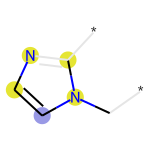

In [14]:
Draw.DrawMorganBit(mol1, 2136, info1, useSVG=True)

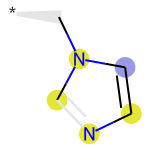

In [15]:
Draw.DrawMorganBit(mol2, 2136, info2, useSVG=True)

In [16]:
#For additional info, refer to: http://rdkit.blogspot.com/2016/02/morgan-fingerprint-bit-statistics.html

# Maximum Common Substructure Search

In [17]:
from rdkit.Chem import rdFMCS
#res = rdFMCS.FindMCS([mol1,mol2])
res = rdFMCS.FindMCS([mol1,mol2], ringMatchesRingOnly=True)
print(res.smartsString)

[#6&R]-&!@[#6&!R]-&!@[#7&R]1:&@[#6&R]:&@[#6&R]:&@[#7&R]:&@[#6&R]:&@1


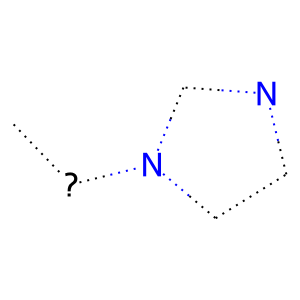

In [18]:
Draw.MolToImage(Chem.MolFromSmarts(res.smartsString))

# Similarity Analysis

In [19]:
# different similarity formula, different definition of vector representation 
# -> different similarity

from rdkit import DataStructs
print(DataStructs.FingerprintSimilarity(fp1, fp2, metric=DataStructs.TanimotoSimilarity))
#https://pubs.acs.org/doi/pdf/10.1021/ci9800211
#Available similarity metrics include Tanimoto, Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey.

0.1391304347826087


In [20]:
mol_A = Chem.MolFromSmiles('Cc1ccccc1')
mol_B = Chem.MolFromSmiles('Clc1ccccc1')
mol_C = Chem.MolFromSmiles('c1ccccc1')

#fp_A = AllChem.GetMorganFingerprintAsBitVect(mol_A, 3, nBits=4096)
#fp_B = AllChem.GetMorganFingerprintAsBitVect(mol_B, 3, nBits=4096)
#fp_C = AllChem.GetMorganFingerprintAsBitVect(mol_C, 3, nBits=4096)

fp_A = AllChem.GetMorganFingerprintAsBitVect(mol_A, 3, useFeatures=True, nBits=4096)
fp_B = AllChem.GetMorganFingerprintAsBitVect(mol_B, 3, useFeatures=True, nBits=4096)
fp_C = AllChem.GetMorganFingerprintAsBitVect(mol_C, 3, useFeatures=True, nBits=4096)

In [21]:
print(DataStructs.FingerprintSimilarity(fp_A, fp_B, metric=DataStructs.TanimotoSimilarity))
print(DataStructs.FingerprintSimilarity(fp_A, fp_C, metric=DataStructs.TanimotoSimilarity))

0.25
0.4
